<a href="https://colab.research.google.com/github/Jfernando0120/TALLERES-SyS/blob/main/correccion_punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1.1

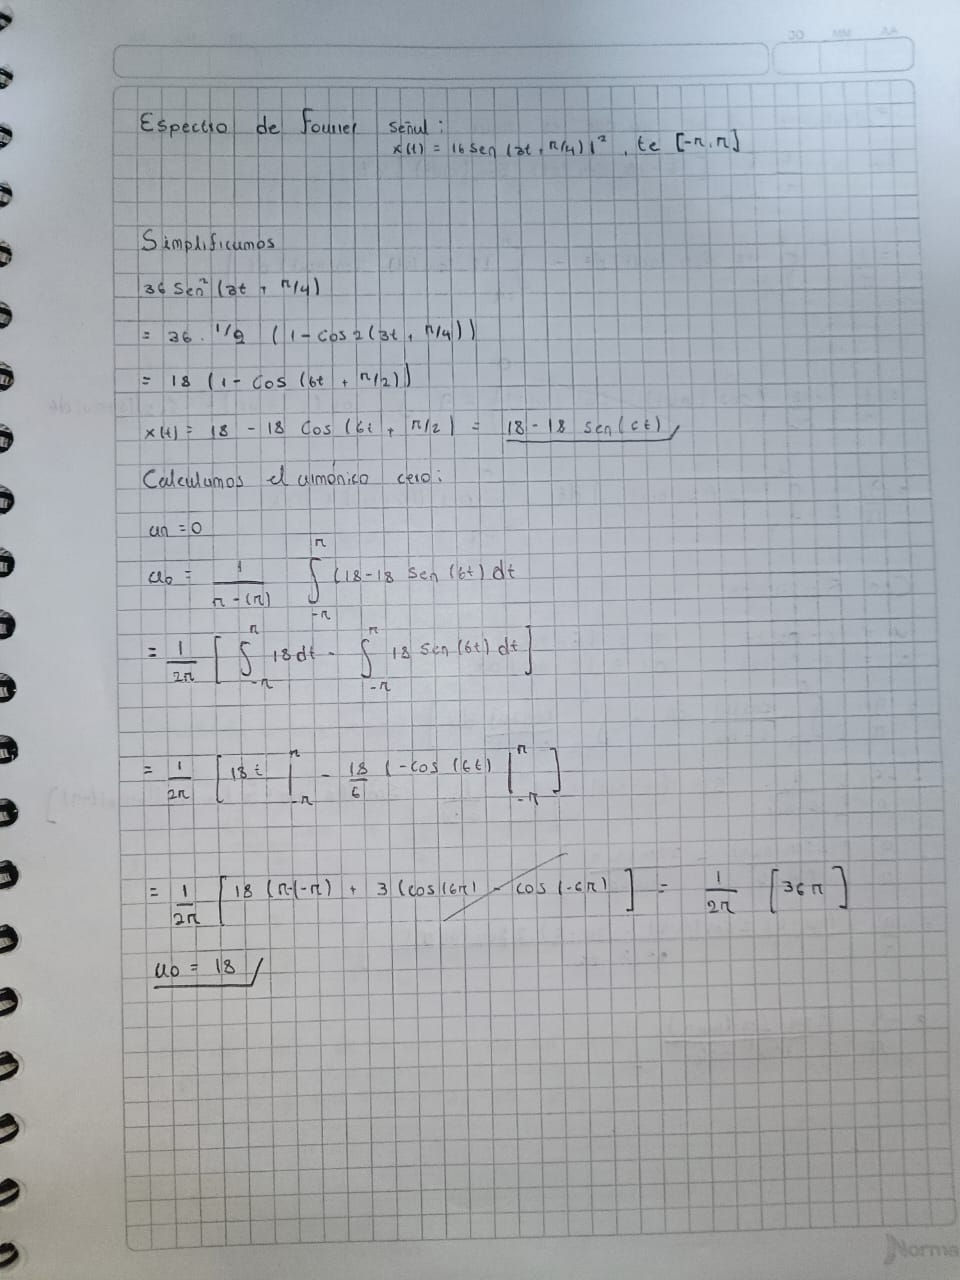

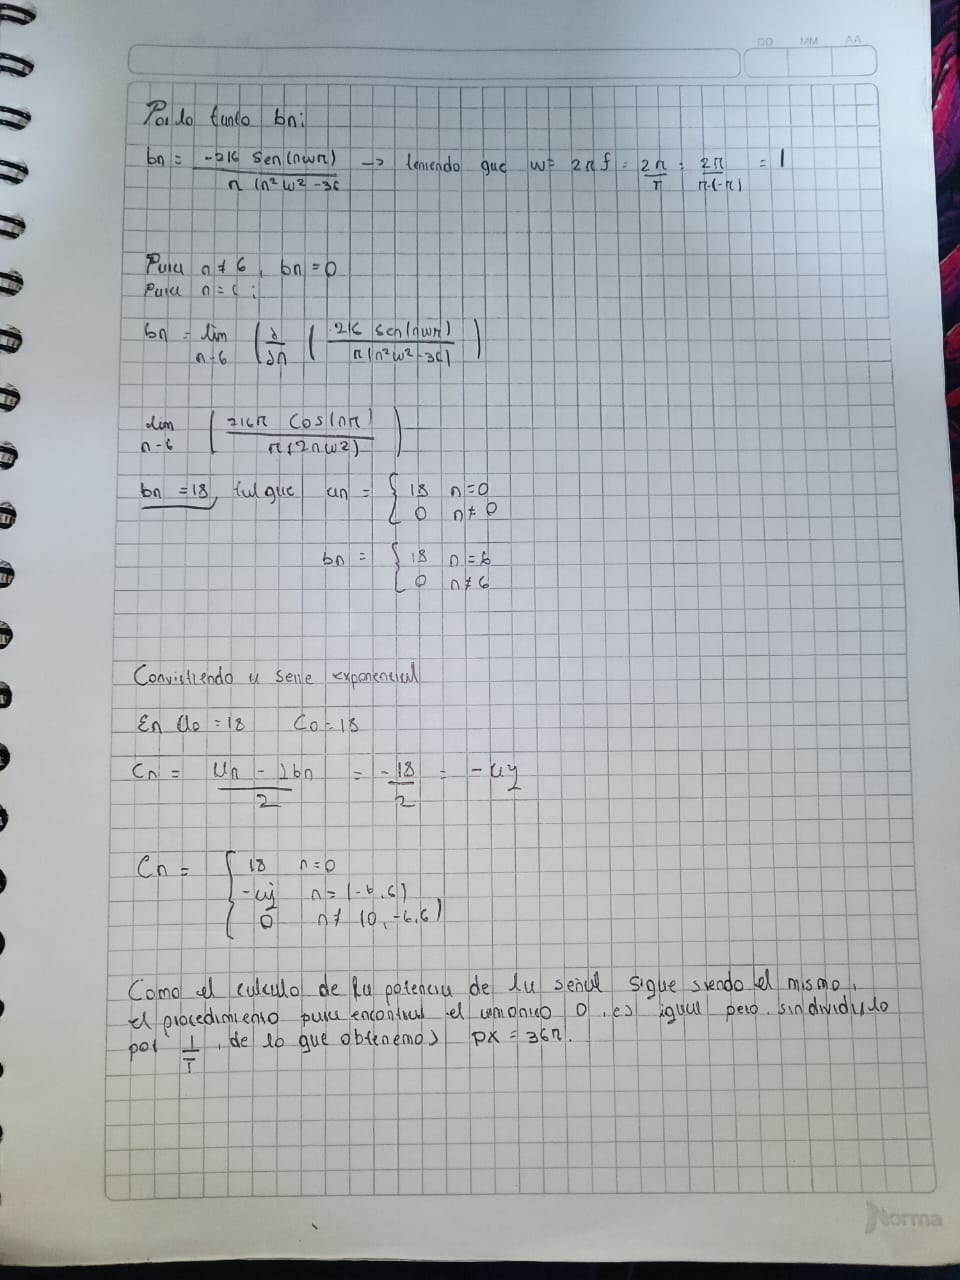

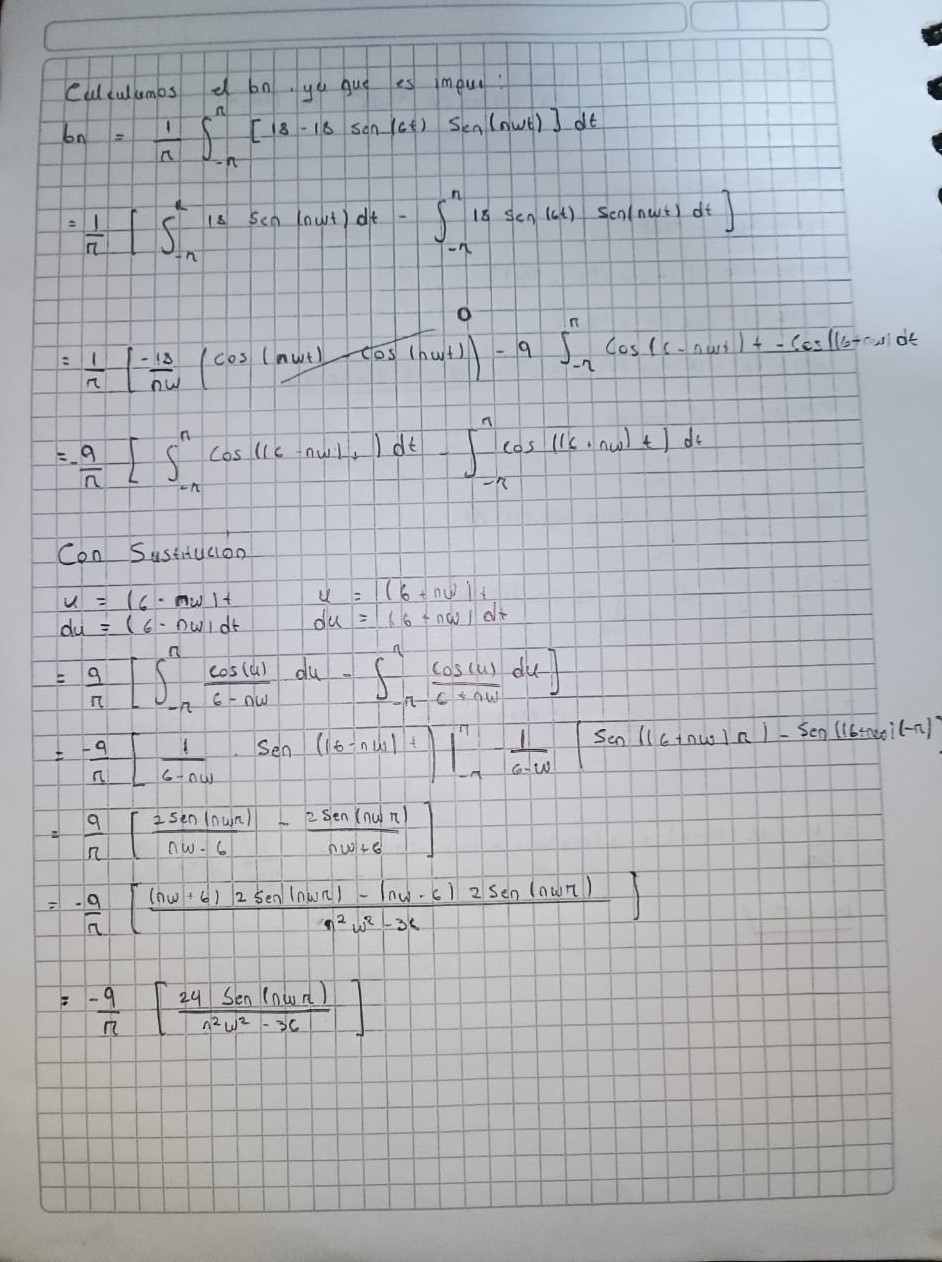

CORRECCION PARTE ESCRITA:
$$x(t)=\left|6\sin\left(3t+\frac{\pi}{4}\right)\right|^2 = 6^2\sin^2\left(3t+\frac{\pi}{4}\right) = 36\left(\frac{1}{2}-\frac{\cos\left(6t+\frac{\pi}{2}\right)}{2}\right) = \frac{36}{2}-\frac{36\cos\left(6t+\frac{\pi}{2}\right)}{2} = 18 - 18\cos\left(6t+\frac{\pi}{2}\right)$$
Entonces:
$$\boxed{x(t) = 18+18\sin(6t)}$$
Por serie trigonométrica:
$$x(t) = a_0 + \sum_{n=1}^N{a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)},$$

donde:

$$a_0 = c_0 = \frac{1}{t_f-t_i}\int_{t_i}^{t_f}x(t)dt$$

y

$$a_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt$$

$$b_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt$$




wo= 1.0
Fo= 1.5707963267948966


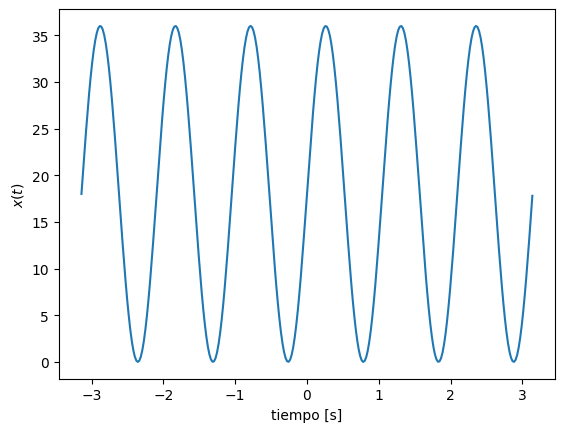

In [ ]:
import matplotlib as mpl
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import warnings
from ipywidgets import interact,IntSlider
from matplotlib import animation, rc
import numpy as np
import matplotlib.pyplot as plt



ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
T = tf-ti
wo = 2*np.pi/T #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 30*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo
Nm = len(tv)#muestras en el tiempo
xo = abs(6*np.sin(3*tv+np.pi/4))**2 #señal de entrada
plt.plot(tv,xo) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

Dado que $x(t)$ presenta simetría impar, $x(t)=-x(-t)$:


 $$\boxed{a_n = 0 \quad \forall n \in \{1,\dots,N\}}$$

Así:

$$x(t)=\left|6\sin\left(3t+\frac{\pi}{4}\right)\right|^2 = 18+18\sin(6t) = a_0 + \sum_{n=1}^N{b_n\sin(n\omega_0 t)}$$

$a_0$ codifica el nivel DC de la señal, entonces:

$$a_0 = \frac{1}{\pi-(-\pi)}\int_{-\pi}^{\pi}\left(18+18\sin(6t)\right)dt = \frac{18}{2\pi}\int_{-\pi}^{\pi}dt+\frac{18}{2\pi}\int_{-\pi}^{\pi}\sin(6t)dt$$

$$a_0 = \frac{18}{2\pi} t \Big|_{-\pi}^{\pi} - \frac{18}{12\pi}\cos(6t)\Big|_{-\pi}^\pi = \frac{18(\pi-(-\pi))}{2\pi}-\frac{18}{12\pi}\left(\cos(6\pi)-\cos(-6\pi)\right) = \frac{18 \cdot 2\pi}{2\pi} - 0 = 18$$

$$\boxed{a_0 = 18}$$

Por otra parte,

$$b_n = \frac{2}{\pi-(-\pi)}\int_{-\pi}^{\pi}x(t)\sin(n\omega_0 t)dt = \frac{2}{2\pi}\int_{-\pi}^{\pi}\left( 18+18\sin(6t)\right)\sin(n\omega_0 t)dt$$

$$b_n = \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(n\omega_0 t)dt} + \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(6t)\sin(n\omega_0 t)dt}$$

Teniendo en cuenta que:


$$\sin(\theta)\sin(\alpha)=\frac{\cos(\theta-\alpha)-\cos(\theta+\alpha)}{2}$$

Entonces:

$$b_n = \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(n\omega_0 t)dt} + \frac{9}{\pi}\int_{-\pi}^{\pi}{\cos([6-n\omega_0] t)dt} - \frac{9}{\pi}\int_{-\pi}^{\pi}{\cos([6+n\omega_0] t)dt}$$

En este caso: $\boxed{\omega_0 = 2\pi/2\pi = 1 [rad/s]}$

$$b_n = -\frac{18}{\pi n }\cos(nt)\Big|_{-\pi}^{\pi} + \frac{9}{\pi(6-n)}\sin([6-n]t)\Big|_{-\pi}^{\pi} - \frac{9}{\pi(6+n)}\sin([6+n]t)\Big|_{-\pi}^{\pi}$$

$$b_n = -\frac{18}{\pi n }\left(\cos(n\pi)-\cos(-n\pi)\right) + 9\frac{\sin([6-n]\pi)-\sin(-[6-n]\pi)}{\pi(6-n)}-9\frac{\sin([6+n]\pi)-\sin(-[6+n]\pi)}{\pi(6+n)}$$

Recordemos que $\cos(\theta)=\cos(-\theta)$ y $\sin(\theta)=-\sin(-\theta)$, entonces:

$$b_n = -\frac{18}{\pi n }\left(\cos(n\pi)-\cos(n\pi)\right) + 9\frac{\sin([6-n]\pi)+\sin([6-n]\pi)}{\pi(6-n)}-9\frac{\sin([6+n]\pi)+\sin([6+n]\pi)}{\pi(6+n)}$$

$$b_n = 18\frac{\sin([6-n]\pi)}{\pi(6-n)}-18\frac{\sin([6+n]\pi)}{\pi(6+n)}$$


Para $n\neq 6,$ $b_n = 0.$ No obstante, para $n = 6$ debemos calcular el límite y aproximar la indeterminación $\frac{0}{0}$:


$$b_6 = 18\lim_{n\to 6}\frac{\tfrac{d}{dn}\left[\sin([6-n]\pi)\right]}{\tfrac{d}{dn}\left[\pi(6-n)\right]} = 18\lim_{n\to 6}\frac{\cos([6-n]\pi)(-\pi)}{-\pi}$$

$$b_6 = 18\cos(0)= 18$$

$$\boxed{b_6 = 18}$$


$$b_{-6 }= -18\lim_{n\to {-6}}\frac{\tfrac{d}{dn}\left[\sin([6+n]\pi)\right]}{\tfrac{d}{dn}\left[\pi(6+n)\right]} = -18\lim_{n\to -6}\frac{\cos([6+n]\pi)(\pi)}{\pi}$$

$$b_{-6} = -18\cos(0)= -18$$

$$\boxed{b_{-6} = -18}$$

Por consiguiente:

$$\boxed{b_n = \left\{\begin{align} 0 & \quad \forall n \setminus \{-6,6\}\\
18 & \quad n = 6\\
-18 & \quad n = -6\\
\end{align}\right.}$$

$$\boxed{x(t) = a_0+\sum_{n=1}^{N}{b_n \sin(nt)} = a_0+b_6\sin(6t)=18+18\sin(6t)}$$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = 18$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:

$$\boxed{c_n = \left\{\begin{align}
9j & \quad n = -6\\
18 & \quad n = 0\\
-9j & \quad n = 6\\
0 & \quad \forall n \setminus \{-6,0,6\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$$x(t) = c_{-6}e^{-j6t} + c_{0}e^{0} + c_{6}e^{j6t}$$

$$x(t)= 9j(\cos(6t)-j\sin(6t))+18-9j(\cos(6t)+j\sin(6t)) $$

$$\boxed{x(t) = 9j\cos(6t)+9\sin(6t))+18-9j\cos(6t)+9\sin(6t)=18+18\sin(6t)}$$

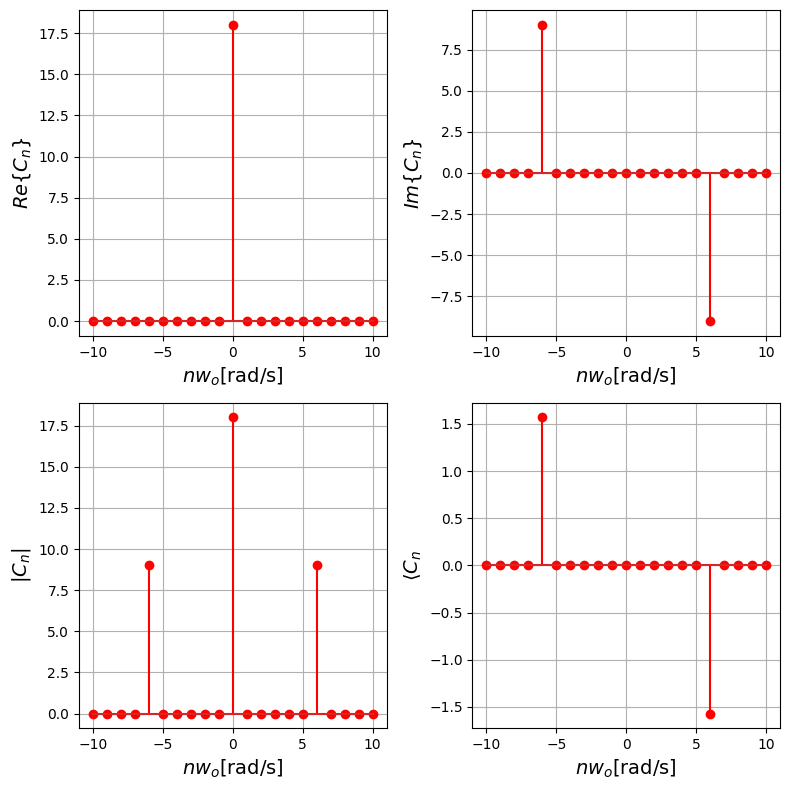

In [ ]:
#se presenta la simulación del espectro y la reconstrucción
#construir bases serie exponencial
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#espectro de la señal - serie exponencial
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = 18 # nivel dc C_0
Cn[N-6] = 1j*9
Cn[N+6] = -1j*9
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Encontramos la potencia de la señal para calcular el error relativo:


$$e_r[\%] = \frac{\bar{P}_e}{\bar{P_x}} 100[\%] = \left(1-\frac{\sum^N_{n=-N}|c_n|^2P_n}{\bar{P}_x}\right)100[\%]$$

En este caso, la potencia de $x(t)$ se cálcula como:

\begin{equation}
P_x = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}{|x(t)^2|dt} = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}{|18+18\sin(6t)|^2dt} = \frac{1}{2\pi}\left(18^2\int\limits_{-\pi}^{\pi}dt + 2 \cdot 18^2 \int\limits_{-\pi}^{\pi}\sin(6t)dt + 18^2\int\limits_{-\pi}^{\pi}\sin^2(6t)dt\right)
\end{equation}


$$ P_x = \frac{1}{2\pi}\left(18^2(2\pi) + 2\cdot18^2(-\cos(6\pi)+\cos(-6\pi))+\frac{18^2}{2}\left(\int\limits_{-\pi}^{\pi}dt - \int\limits_{-\pi}^{\pi}\cos(12t)dt\right)\right)$$

$$P_x = \frac{1}{2\pi}\left(18^2(2\pi) +\frac{18^2(2\pi)}{2}-\frac{18^2}{2}(\sin(24\pi)-\sin(-24\pi))\right)$$

$$\boxed{P_x = 18^2 \left(\frac{3\pi}{2\pi}\right) = \frac{3}{2}18^2}$$

para el caso de la serie exponencial de Fourier $P_n=1$, por consiguiente:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right).
\end{equation}

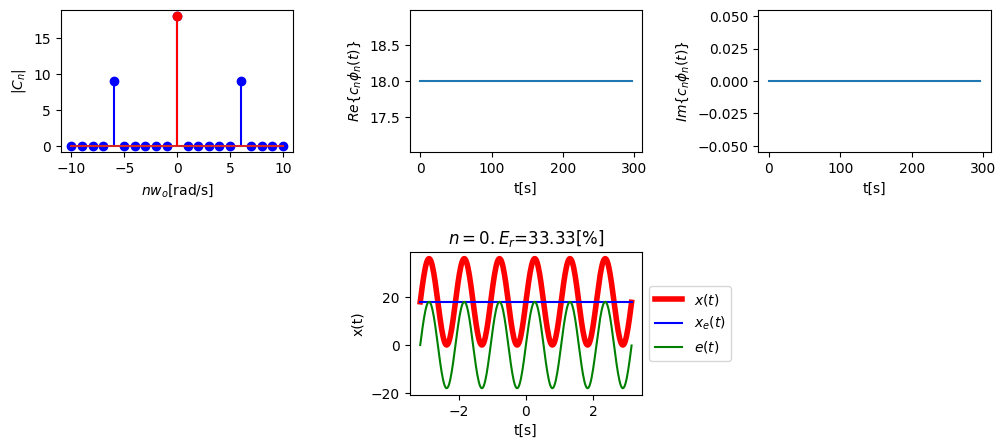

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (3/2)*(18**2)
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

anim